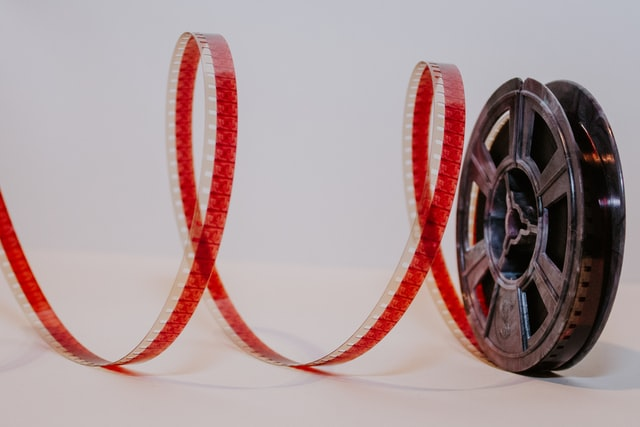

<h1><center>Current Movie Industry Analysis</h1></center>
<h2><center>Author: <span style="color: red;">Diane Tunnicliffe</h2></center></span>

<h3><span style="color: red;">Overview</h3></span>

I have been asked to imagine that I am tasked with assisting Microsoft in their venture into the movie industry. My goal is to explore what type of films are currently doing the best at the box office, and to provide these findings to Microsoft's new movie studio executives. I must then translate these findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
(A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.)

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [17]:
# importing the packages I will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h3><span style="color: red;">IMDb Title Basics</h3></span>  

I began by exploring the first file we were provided, <code>'imdb.title.basics.csv'</code>.  

In [18]:
# reading the first csv file
title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
# previewing the DataFrame
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
# getting info for DataFrame
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Right away, I noticed that some of the information provided was not inherently comprehensible. Some of these column names required a bit of further digging to understand; for instance, the column labeled <code>'tconst'</code>. I consulted the IMDb data reference page and found that <code>'tconst'</code> is described as an "alphanumeric unique identifier of the title."  

Using the same resource, I was able to find that <code>'primary_title'</code> is "the more popular title / the title used by the filmmakers on promotional materials at the point of release", while <code>'original_title'</code> is, as it sounds, the "original title, in the original language".   

The rest of the columns seemed to be self-explanatory. The <code>start_year</code> column represents the year of the release date. I noted that the <code>'genre'</code> column would likely be helpful in determining which types of movies are most successful.

In [28]:
# getting stats for start_year column
title_basics_df.start_year.describe().round(2)

count    146144.00
mean       2014.62
std           2.73
min        2010.00
25%        2012.00
50%        2015.00
75%        2017.00
max        2115.00
Name: start_year, dtype: float64

In [33]:
# getting value_counts for start_year column
title_basics_df.start_year.value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

The earliest release-year for movies in this dataset is 2010, but the latest(max) release-year is listed as 2115. This seemed like an error, so I knew it would require further investigation.

In [30]:
# getting value_counts for genres column
title_basics_df.genres.value_counts()

Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
Action,Documentary,Thriller         1
Crime,Family,Fantasy                1
Music,Mystery                       1
Animation,Documentary,Horror        1
Action,Adventure,Musical            1
Name: genres, Length: 1085, dtype: int64

As I explored the data, I could tell that working with these genres would not be as straightforward as I had hoped. When I tried to get a value count for each genre, I found that there were 1,085 different genres listed! Many of these unique values were actually various combinations of multiple genres. 

In [8]:
title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Since <code>title_ratings_df</code> also has a <code>'tconst'</code> column, I immediately think that this would be a convenient way to join these two dataframes.

In [10]:
movie_gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


I noticed that <code>movie_gross_df</code> does not have a <code>'tconst'</code> column because it comes from a different source (Box Office Mojo as opposed to IMDb); however, it does have a <code>'title'</code> column that can be used when merging the data. 

In [20]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***